# Install Fastai 

In [1]:
 !curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   665  100   665    0     0   2231      0 --:--:-- --:--:-- --:--:--  2231
Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (1.0.28)
Already up to date.


## Verify installation

In [2]:
from fastai import *
from fastai.vision import *

__version__

'1.0.28'

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Creating Custom Dataset

Here we create our own dataset using results from google images. 
We'll make a leopard versus cheetah classifier. 

Use [this](https://github.com/hardikvasa/google-images-download) code to download.
Begin by mounting the google drive

In [4]:
# Mount Gdrive

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# Change working directory 

import os
os.chdir("drive/My Drive/fastai/cheetah_leopard")

In [7]:
!pip install google_images_download

In [10]:
!googleimagesdownload -k "cheetah" -l 150 -o "data" 


Item no.: 1 --> Item name = cheetah
Evaluating...
Looks like we cannot locate the path the 'chromedriver' (use the '--chromedriver' argument to specify the path to the executable.) or google chrome browser is not installed on your machine (exception: expected str, bytes or os.PathLike object, not NoneType)


In [58]:
!googleimagesdownload -k "leopard" -l 150 -o "data" 


Item no.: 1 --> Item name = leopard
Evaluating...
Looks like we cannot locate the path the 'chromedriver' (use the '--chromedriver' argument to specify the path to the executable.) or google chrome browser is not installed on your machine (exception: expected str, bytes or os.PathLike object, not NoneType)


In [21]:
path = Path('data')
path.ls()

[PosixPath('data/cheetah'), PosixPath('data/leopard')]

Fastai has an interactive tool to helpinmanual cleaningof data. Asipywidgets are not yet supported by colab, clean data manually in GDrive first.

In [0]:
classes = ['cheetah', 'leopard']

In [24]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

cheetah


leopard


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=229, num_workers=4).normalize(imagenet_stats)

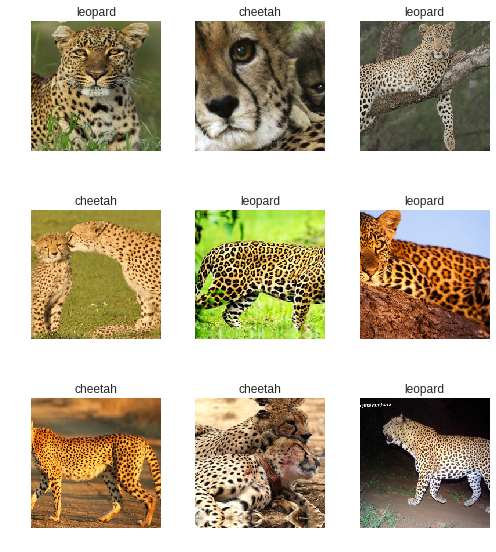

In [26]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
print(data.classes)
len(data.classes),data.c

['english_cocker_spaniel', 'boxer', 'basset_hound', 'saint_bernard', 'american_bulldog', 'wheaten_terrier', 'keeshond', 'pomeranian', 'scottish_terrier', 'beagle', 'miniature_pinscher', 'german_shorthaired', 'great_pyrenees', 'pug', 'British_Shorthair', 'Bombay', 'Siamese', 'american_pit_bull_terrier', 'japanese_chin', 'Sphynx', 'Bengal', 'leonberger', 'english_setter', 'Maine_Coon', 'samoyed', 'shiba_inu', 'Russian_Blue', 'newfoundland', 'Persian', 'Ragdoll', 'havanese', 'staffordshire_bull_terrier', 'chihuahua', 'Birman', 'yorkshire_terrier', 'Abyssinian', 'Egyptian_Mau']


(37, 37)

## Training: resnet50

Now we will start training our model. We will use a convolutional neural network backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 ouptuts).


We will train for 5 epochs (5 cycles through all our data).

In [27]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 75565290.44it/s]


In [28]:
learn.fit_one_cycle(5)

Total time: 01:04
epoch  train_loss  valid_loss  error_rate
1      0.789941    0.496520    0.222222    (00:27)
2      0.503498    0.134264    0.000000    (00:09)
3      0.340613    0.067137    0.000000    (00:08)
4      0.257628    0.039039    0.000000    (00:09)
5      0.210409    0.031291    0.000000    (00:10)



In [0]:
learn.save('stage-1')

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will unfreeze our model and train some more.

In [0]:
learn.unfreeze()

In [31]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


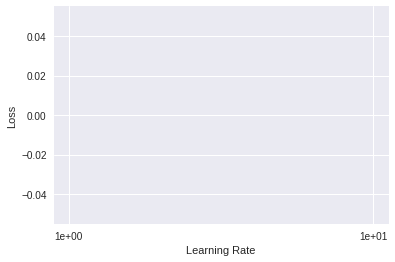

In [32]:
learn.recorder.plot()

In [33]:
learn.fit_one_cycle(5, max_lr=slice(7e-4,5e-3))

Total time: 00:47
epoch  train_loss  valid_loss  error_rate
1      0.045292    4.154558    0.388889    (00:09)
2      0.519427    165.609192  0.388889    (00:09)
3      0.842122    47.174763   0.388889    (00:08)
4      0.729354    15.091244   0.333333    (00:09)
5      0.648099    1.162069    0.222222    (00:09)



In [0]:
learn.save('stage-2')

## Interpretation

In [35]:
learn.load('stage-2')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (73 items)
[Category cheetah, Category cheetah, Category cheetah, Category cheetah, Category cheetah]...
Path: data
x: ImageItemList (73 items)
[Image (3, 845, 1400), Image (3, 1068, 1900), Image (3, 2092, 3192), Image (3, 2336, 3504), Image (3, 650, 1156)]...
Path: data;
Valid: LabelList
y: CategoryList (18 items)
[Category cheetah, Category cheetah, Category leopard, Category leopard, Category cheetah]...
Path: data
x: ImageItemList (18 items)
[Image (3, 300, 442), Image (3, 1365, 2048), Image (3, 360, 640), Image (3, 360, 828), Image (3, 3648, 5472)]...
Path: data;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): 

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

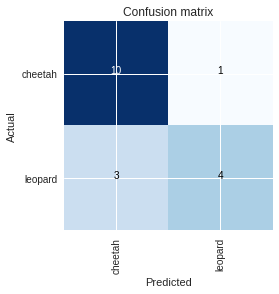

In [37]:
interp.plot_confusion_matrix()

In [38]:
data.classes

['cheetah', 'leopard']

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

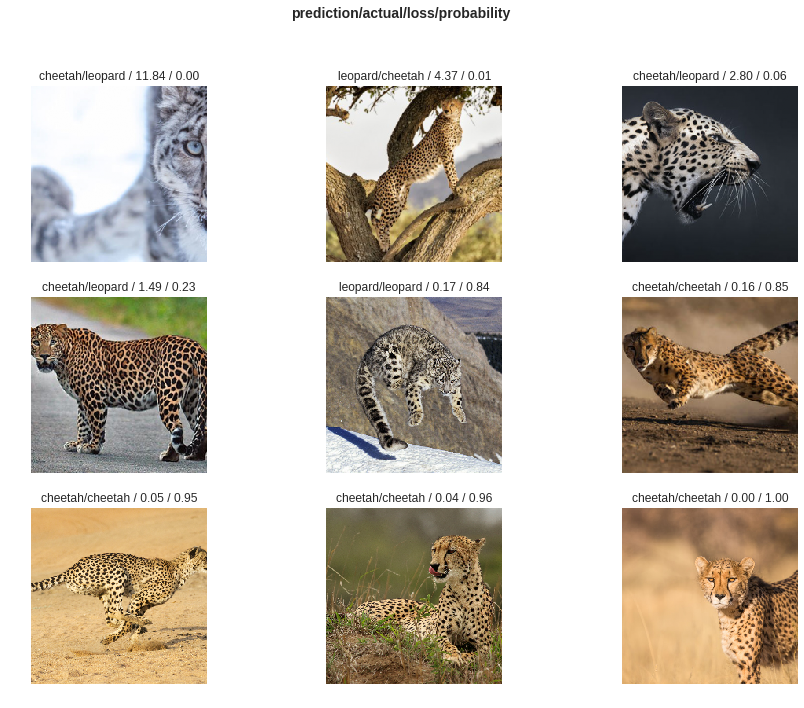

In [40]:
interp.plot_top_losses(9, figsize=(15,11))

In [41]:
interp.most_confused(min_val=2)

[('leopard', 'cheetah', 3)]

## Using Inferences

In [0]:
defaults.device = torch.device('cpu')

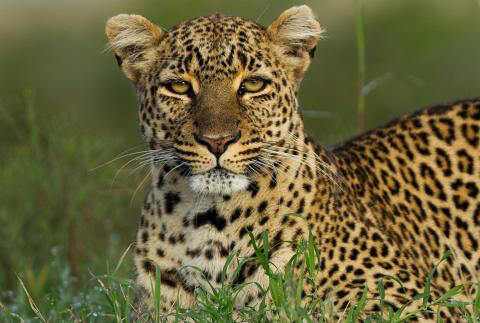

In [44]:
img = open_image(path/'leopard'/'46. leopard-eric-gurwin-dpc.jpg')
img

In [47]:
classes = ['cheetah', 'leopard']
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=229).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet50)
learn.load('stage-2')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (1 items)
[]...
Path: data
x: ImageItemList (1 items)
[]...
Path: data;
Valid: LabelList
y: CategoryList (1 items)
[]...
Path: data
x: ImageItemList (1 items)
[]...
Path: data;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2

In [48]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

'cheetah'